In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression,Lasso,Ridge,LassoCV,RidgeCV,ElasticNet,ElasticNetCV
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error,mean_squared_error,r2_score
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [4]:
df = pd.read_csv(r"C:\Users\manoj\Desktop\p2_data.csv")
df.replace({'\xa0': ' '}, regex=True, inplace=True)

In [5]:
df.head()

,Job Title,Job Salary,Job Experience Required,Skills,Role,Location
0,Technical Support,"2,00,000 - 4,00,000 PA.",0,"Troubleshooting, Customer Service, Hardware Su...",Technical Support Engineer,Mumbai
1,Sales,"2,00,000 - 3,00,000 PA.",0,"Communication, CRM, Negotiation, Lead Generation",Sales Executive,Bengaluru
2,Business Development,"2,50,000 - 4,50,000 PA.",0,"Lead Generation, Sales Strategy, Market Resear...",Business Development Manager,Delhi
3,Key Accounts Manager,"1,50,000 - 3,00,000 PA.",0,"Financial Reporting, Tally, Taxation, Auditing...",Key Account Manager,Bengaluru
4,Assistant Restaurant Manager,"3,75,000 - 5,50,000 PA.",5,"Team Management, Customer Service, Inventory C...",Restaurant Manager,Delhi


## Data Validation

In [7]:
df.isna().sum()

Job Title                    0
Job Salary                   3
Job Experience Required      0
Skills                       0
Role                       142
Location                     0
dtype: int64

In [8]:
df["Job Salary"].value_counts()

Job Salary
2,00,000 - 3,00,000 PA.          41
3,00,000 - 6,00,000 PA.          38
2,00,000 - 4,00,000 PA.          32
3,00,000 - 5,00,000 PA.          30
3,00,000 - 8,00,000 PA.          28
                                 ..
INR 2,00,000 - 5,00,000 PA.       1
INR 10,00,000 - 20,00,000 PA.     1
7,50,000 - 17,00,000 PA.          1
6,00,000 - 13,00,000 PA.          1
70,000 - 1,00,000 PA.             1
Name: count, Length: 389, dtype: int64

In [9]:
df.isnull().sum()/len(df)

Job Title                  0.000000
Job Salary                 0.001743
Job Experience Required    0.000000
Skills                     0.000000
Role                       0.082510
Location                   0.000000
dtype: float64

In [10]:
df1= df['Job Salary'].str.split('-',expand=True)

In [11]:
df1.columns=['Min Salary','Max Salary']
df1

,Min Salary,Max Salary
0,"2,00,000","4,00,000 PA."
1,"2,00,000","3,00,000 PA."
2,"2,50,000","4,50,000 PA."
3,"1,50,000","3,00,000 PA."
4,"3,75,000","5,50,000 PA."
...,...,...
1716,"12,00,000","17,00,000 PA."
1717,"5,00,000","8,00,000 PA."
1718,"2,50,000","7,50,000 PA."
1719,"70,000","1,00,000 PA."


In [12]:
df1['Min Salary'] = df1['Min Salary'].str.replace('INR','')


In [13]:
df1['Min Salary'] = df1['Min Salary'].str.replace('PA.','')

In [14]:
df1['Min Salary'] = df1['Min Salary'].str.replace(',','')

In [15]:
df1['Min Salary'] = df1['Min Salary'].str.replace(' ','')

In [16]:
df1['Min Salary'] = df1['Min Salary'].replace('Notdisclosed', np.nan)

In [17]:
df1['Max Salary'] = df1['Max Salary'].str.replace('PA.','')

In [18]:
df1['Max Salary'] = df1['Max Salary'].str.replace(',','')

In [19]:
df1['Max Salary'] = df1['Max Salary'].str.replace(' ','')

In [20]:
df1['Max Salary'] = df1['Max Salary'].replace('Notdisclosed', np.nan)

In [21]:
df1['Min Salary']=df1['Min Salary'].astype('float')


In [22]:
df1['Max Salary']=df1['Max Salary'].astype('float')

In [23]:
df1['Min Salary']=df1['Min Salary']/100000

In [24]:
df1['Max Salary']=df1['Max Salary']/100000

In [25]:
df1.info

<bound method DataFrame.info of       Min Salary  Max Salary
0           2.00         4.0
1           2.00         3.0
2           2.50         4.5
3           1.50         3.0
4           3.75         5.5
...          ...         ...
1716       12.00        17.0
1717        5.00         8.0
1718        2.50         7.5
1719        0.70         1.0
1720        2.25         3.0

[1721 rows x 2 columns]>

In [26]:
df=pd.concat([df.drop(columns=['Job Salary']),df1],axis=1)
df

,Job Title,Job Experience Required,Skills,Role,Location,Min Salary,Max Salary
0,Technical Support,0,"Troubleshooting, Customer Service, Hardware Su...",Technical Support Engineer,Mumbai,2.00,4.0
1,Sales,0,"Communication, CRM, Negotiation, Lead Generation",Sales Executive,Bengaluru,2.00,3.0
2,Business Development,0,"Lead Generation, Sales Strategy, Market Resear...",Business Development Manager,Delhi,2.50,4.5
3,Key Accounts Manager,0,"Financial Reporting, Tally, Taxation, Auditing...",Key Account Manager,Bengaluru,1.50,3.0
4,Assistant Restaurant Manager,5,"Team Management, Customer Service, Inventory C...",Restaurant Manager,Delhi,3.75,5.5
...,...,...,...,...,...,...,...
1716,Sr. Manager,8,"Strategic Planning, Team Management, Project O...",Operations Manager,Noida,12.00,17.0
1717,Project Manager,8,"Project Planning, Risk Management, Stakeholder...",Project Manager-IT,Chennai,5.00,8.0
1718,Magento Developer,2,"Magento, PHP, MySQL, JavaScript, eCommerce Dev...",Software Developer,Bengaluru,2.50,7.5
1719,Day Care Teacher,0,"Child Care, Activity Planning, Classroom Manag...",DaycareTeacher,Mumbai,0.70,1.0


In [27]:
df['Job Experience Required'] = df['Job Experience Required'].replace('Not mentioned', np.nan)

In [28]:
df['Job Experience Required']=df['Job Experience Required'].astype('float')

In [29]:
df["Job Experience Required"].unique

<bound method Series.unique of 0       0.0
1       0.0
2       0.0
3       0.0
4       5.0
       ... 
1716    8.0
1717    8.0
1718    2.0
1719    0.0
1720    2.0
Name: Job Experience Required, Length: 1721, dtype: float64>

In [30]:
df.shape

(1721, 7)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Job Title                1721 non-null   object 
 1   Job Experience Required  1718 non-null   float64
 2   Skills                   1721 non-null   object 
 3   Role                     1579 non-null   object 
 4   Location                 1721 non-null   object 
 5   Min Salary               1718 non-null   float64
 6   Max Salary               1716 non-null   float64
dtypes: float64(3), object(4)
memory usage: 94.2+ KB


## EDA

## Filling Null values

In [34]:
c = df.select_dtypes(include = 'object')

In [35]:
n = df.select_dtypes(include = 'float')

In [36]:
for i in c:
    df[i].fillna(df[i].mode()[0],inplace=True)
    


In [37]:
for i in n:
    df[i].fillna(df[i].mean(),inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Job Title                1721 non-null   object 
 1   Job Experience Required  1721 non-null   float64
 2   Skills                   1721 non-null   object 
 3   Role                     1721 non-null   object 
 4   Location                 1721 non-null   object 
 5   Min Salary               1721 non-null   float64
 6   Max Salary               1721 non-null   float64
dtypes: float64(3), object(4)
memory usage: 94.2+ KB


## Outlier handling

In [40]:
df.columns

Index(['Job Title', 'Job Experience Required', 'Skills', 'Role', 'Location',
       'Min Salary', 'Max Salary'],
      dtype='object')

In [41]:
nd = df[['Job Experience Required', 'Min Salary', 'Max Salary']]

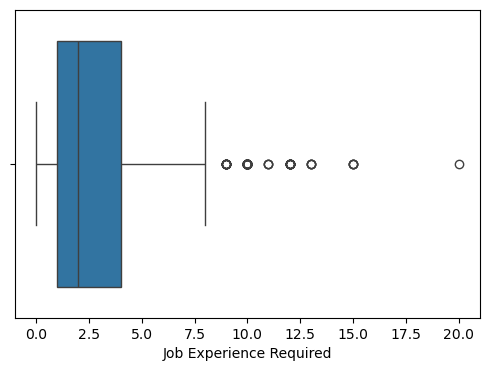

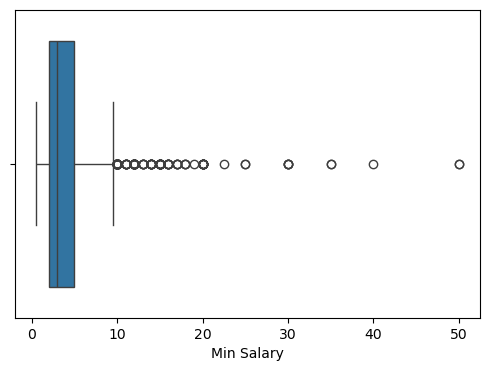

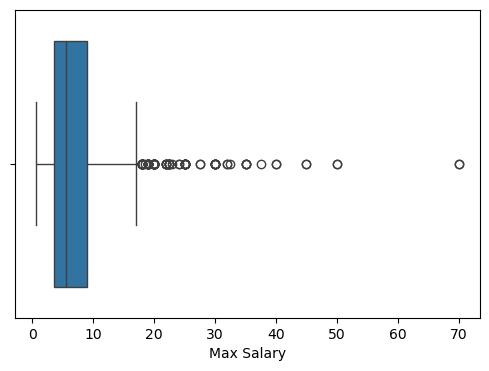

In [42]:
for col in nd.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=nd[col])
    plt.show()

In [43]:
for col in nd.columns:
    Q1 = nd[col].quantile(0.25)
    Q3 = nd[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    nd[col] = np.where(nd[col] < lower_bound, lower_bound, 
             np.where(nd[col] > upper_bound, upper_bound,nd[col]))

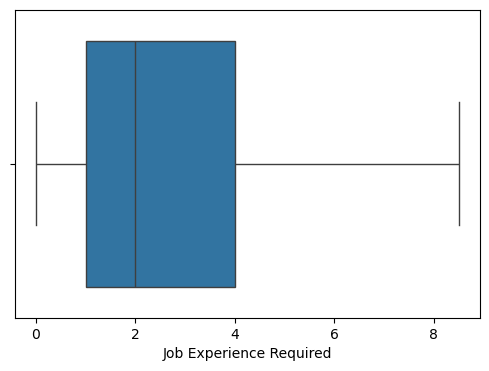

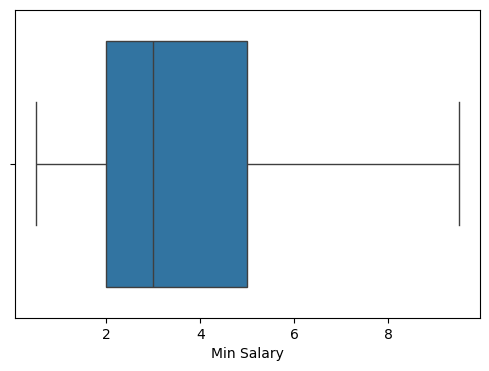

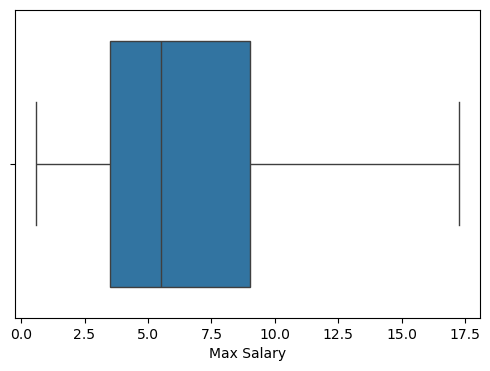

In [44]:
for col in nd.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=nd[col])
    plt.show()

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Job Title                1721 non-null   object 
 1   Job Experience Required  1721 non-null   float64
 2   Skills                   1721 non-null   object 
 3   Role                     1721 non-null   object 
 4   Location                 1721 non-null   object 
 5   Min Salary               1721 non-null   float64
 6   Max Salary               1721 non-null   float64
dtypes: float64(3), object(4)
memory usage: 94.2+ KB


## Data splitting

In [47]:
#x=df[['Job Experience Required','Skills','Location','Role']]

In [48]:
#y=df[['Min Salary','Max Salary']]

In [49]:
nd=df.select_dtypes(include='number')

In [50]:
cd=df.select_dtypes(include='object')

In [51]:
cd

,Job Title,Skills,Role,Location
0,Technical Support,"Troubleshooting, Customer Service, Hardware Su...",Technical Support Engineer,Mumbai
1,Sales,"Communication, CRM, Negotiation, Lead Generation",Sales Executive,Bengaluru
2,Business Development,"Lead Generation, Sales Strategy, Market Resear...",Business Development Manager,Delhi
3,Key Accounts Manager,"Financial Reporting, Tally, Taxation, Auditing...",Key Account Manager,Bengaluru
4,Assistant Restaurant Manager,"Team Management, Customer Service, Inventory C...",Restaurant Manager,Delhi
...,...,...,...,...
1716,Sr. Manager,"Strategic Planning, Team Management, Project O...",Operations Manager,Noida
1717,Project Manager,"Project Planning, Risk Management, Stakeholder...",Project Manager-IT,Chennai
1718,Magento Developer,"Magento, PHP, MySQL, JavaScript, eCommerce Dev...",Software Developer,Bengaluru
1719,Day Care Teacher,"Child Care, Activity Planning, Classroom Manag...",DaycareTeacher,Mumbai


In [52]:
print(dir())  # Lists all available functions


['AdaBoostRegressor', 'DecisionTreeRegressor', 'ElasticNet', 'ElasticNetCV', 'GradientBoostingRegressor', 'IQR', 'In', 'KNeighborsRegressor', 'Lasso', 'LassoCV', 'LinearRegression', 'Out', 'PolynomialFeatures', 'Q1', 'Q3', 'RandomForestRegressor', 'Ridge', 'RidgeCV', 'SVR', 'XGBRegressor', '_', '_11', '_25', '_26', '_29', '_30', '_32', '_33', '_39', '_40', '_46', '_5', '_51', '_6', '_7', '_8', '_9', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__pandas', '__session__', '__spec__', '_dh', '_i', '_i1', '_i10', '_i11', '_i12', '_i13', '_i14', '_i15', '_i16', '_i17', '_i18', '_i19', '_i2', '_i20', '_i21', '_i22', '_i23', '_i24', '_i25', '_i26', '_i27', '_i28', '_i29', '_i3', '_i30', '_i31', '_i32', '_i33', '_i34', '_i35', '_i36', '_i37', '_i38', '_i39', '_i4', '_i40', '_i41', '_i42', '_i43', '_i44', '_i45', '_i46', '_i47', '_i48', '_i49', '_i5', '_i50', '_i51', '_i52', '_i6', '_i7', '_i8', '_i9', '_ih', '_ii', '_iii', '_oh', 'ast', 'c', '

In [53]:
unique_skills = set(df['Skills'].explode().str.strip())
print(f"Unique Skills in Data: {unique_skills}")


Unique Skills in Data: {'Communication, CRM, Negotiation, Lead Generation', 'Financial Strategy, Budgeting, Risk Management, Compliance', 'ICD-10, CPT Coding, Healthcare Terminology, Medical Billing', 'Project Delivery, Client Communication, Agile, Timeline Management, Risk Management', 'Operations Oversight, Team Supervision, SLA Management', 'RF Planning, Network Design, Signal Optimization, Telecom Standards', 'Team Leadership, Operations, Reporting, KPI Management', 'Programming, Software Development, Debugging, SDLC', 'Team Support, Reporting, Client Handling, Communication, Coordination', 'SAP Basis, System Administration, Transport Management, Kernel Upgrades', 'Operations Support, Process Improvement, Team Supervision, Reporting', 'Customer Support, Call Handling, CRM, Issue Resolution', 'Team Management, Project Coordination, Decision Making, Reporting', 'Voice Process, Customer Service, Communication Skills, Night Shifts', 'Adobe Photoshop, Illustrator, CorelDRAW, Creativity,

In [54]:
skill_groups = {
    'Technical Support':['Troubleshooting', 'Customer Service', 'Technical Support', 'Application Support', 'Product Demonstration', 'Ticketing Systems'],
    'Communication Support':['Communication', 'CRM', 'Complaint Resolution', 'Issue Resolution', 'Call Handling', 'Inbound/Outbound Calls', 'Accent Communication'],
    'Front Desk':['Visitor Handling','Front Desk','Scheduling'],
    'Medical Support':['Patient Care','Emergency Response','Medical Reporting'],
    'Java Development':['JavaSpring','Hibernate','REST APIs','Microservices'],
    'Python Development':['Python','Django','Flask','Pandas','SQL'],
    'Full Stack JavaScript':['JavaScript','Node.js','React','MongoDB','Express.js'],
    'Web Development':['HTML','CSS','JavaScript','Responsive Design','PHP','Laravel','MySQL','Web Development'],
    'Microsoft Stack':['C#','ASP.NET','MVC','SQL Server','Web API'],
    'Angular Development':['Angular','TypeScript','REST APIs'],
    'Testing QA':['Selenium','Test Automation','Manual Testing','Defect Reporting','TestNG','Jenkins','Automation Tools'],
    'Data Analytics':['Data Analysis','Excel','SQL','Python','Visualization','Hadoop','Spark','Hive','ETL','Data Engineering','Reporting','Dashboarding','Business Intelligence','Financial Reporting','Budgeting','Taxation'],
    'Design and UI/UX':['Adobe Creative Suite','Photoshop','Illustrator','CorelDRAW','Figma','Adobe XD','Wireframing','Prototyping','UI/UX Design','Interaction Design','Responsive Design'],
    'Administrative and Coordination':['Office Support','Admin Duties','Documentation','Scheduling','Calendar Management','Meeting Coordination','Travel Planning','Data Entry','MS Excel','File Management'],
    'Sales and Business Development':['Lead Generation','Client Acquisition','Sales Strategy','Business Development','Market Research','Territory Management','CRM Usage','Customer Engagement','Performance Monitoring'],
    'Team and Project Management':['Team Management','Leadership','Performance Monitoring','Strategic Planning','Budgeting','Stakeholder Communication','Project Planning','Risk Management','Agile Methodology'],
    'Healthcare and Medical':['ICD-10','CPT','HCPCS','Medical Terminology','Medical Billing','Healthcare Compliance','Nursing Procedures','Patient Examination','Treatment Planning'],
    'Procurement and Inventory':['Inventory Management','Vendor Coordination','Forecasting','Procurement','SAP','Supply Chain','Logistics','ERP Systems','Vendor Management','Cost Control'],
    'Education and Training':['Curriculum Design','Teaching','Lesson Planning','Training Delivery','SOP Development','Evaluation','Student Counseling','Admission Process','Mentoring'],
    'Engineering and Technical':['AutoCAD','SolidWorks','Mechanical Design','Product Design','Circuit Design','Embedded Systems','PCB Layout','PLC Programming','SCADA','Troubleshooting'],
    'Mobile App Development':['Android SDK','Java','Kotlin','Firebase','Swift','iOS SDK','Xcode','UIKit','Flutter','React Native','Ionic','Mobile APIs'],
    'Legal and Compliance':['Corporate Law','Regulatory Filings','Compliance','Contract Drafting','Legal Research','Governance'],
}

In [55]:
import pandas as pd

def create_group_skill_matrix_with_matches(skill_rows, skill_groups):
    # Normalize skill_groups: map lowercase skill -> group(s)
    skill_to_groups = {}
    for group, skills in skill_groups.items():
        for skill in skills:
            skill_to_groups.setdefault(skill.lower(), set()).add(group)

    group_names = list(skill_groups.keys())
    binary_matrix = []
    matched_skills_list = []

    for row in skill_rows:
        skills = [s.strip() for s in row.split(',')]
        row_groups = set()
        matched_skills = {group: [] for group in group_names}

        for skill in skills:
            skill_lower = skill.lower()
            if skill_lower in skill_to_groups:
                for group in skill_to_groups[skill_lower]:
                    row_groups.add(group)
                    matched_skills[group].append(skill)

        binary_matrix.append([1 if group in row_groups else 0 for group in group_names])
        matched_skills_list.append({g: v for g, v in matched_skills.items() if v})  # filter empty

    df_group = pd.DataFrame(binary_matrix, columns=group_names)
    return df_group, matched_skills_list


In [56]:
df_grouped_skills, matched_skills = create_group_skill_matrix_with_matches(df['Skills'], skill_groups)

In [57]:
df = pd.concat([df.drop(columns=['Skills']), df_grouped_skills], axis=1)


In [58]:
df.head()


,Job Title,Job Experience Required,Role,Location,Min Salary,Max Salary,Technical Support,Communication Support,Front Desk,Medical Support,...,Design and UI/UX,Administrative and Coordination,Sales and Business Development,Team and Project Management,Healthcare and Medical,Procurement and Inventory,Education and Training,Engineering and Technical,Mobile App Development,Legal and Compliance
0,Technical Support,0.0,Technical Support Engineer,Mumbai,2.00,4.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,Sales,0.0,Sales Executive,Bengaluru,2.00,3.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,Business Development,0.0,Business Development Manager,Delhi,2.50,4.5,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,Key Accounts Manager,0.0,Key Account Manager,Bengaluru,1.50,3.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Assistant Restaurant Manager,5.0,Restaurant Manager,Delhi,3.75,5.5,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [59]:
cd=df.select_dtypes(include='object')

In [60]:
cd

,Job Title,Role,Location
0,Technical Support,Technical Support Engineer,Mumbai
1,Sales,Sales Executive,Bengaluru
2,Business Development,Business Development Manager,Delhi
3,Key Accounts Manager,Key Account Manager,Bengaluru
4,Assistant Restaurant Manager,Restaurant Manager,Delhi
...,...,...,...
1716,Sr. Manager,Operations Manager,Noida
1717,Project Manager,Project Manager-IT,Chennai
1718,Magento Developer,Software Developer,Bengaluru
1719,Day Care Teacher,DaycareTeacher,Mumbai


In [61]:
round(df.groupby('Role')['Min Salary'].mean(),2).sort_values(ascending=False)

Role
VP / National Manager -Sales         50.00
GM-Marketing                         50.00
GM-Technology(IT)                    35.00
Head / National Manager -Sales       22.67
VP / National Manager After Sales    20.00
                                     ...  
IT                                    1.00
National Manager-Sales                1.00
Safety Officer / Manager              1.00
Data Entry Operator                   0.98
Technical Writer                      0.50
Name: Min Salary, Length: 230, dtype: float64

In [62]:
df.Role.value_counts()

Role
Software Developer                            403
Sales Executive                               117
Business Development Manager                  105
Sales / Business Development Manager           95
Recruitment Executive                          49
                                             ... 
Assistant Manager / Manager-(NonTechnical)      1
CSR Manager                                     1
Documentation / Shipping-Executive              1
Outside Technical Consultant                    1
Assistant Professor                             1
Name: count, Length: 230, dtype: int64

In [63]:
df.select_dtypes("O")

,Job Title,Role,Location
0,Technical Support,Technical Support Engineer,Mumbai
1,Sales,Sales Executive,Bengaluru
2,Business Development,Business Development Manager,Delhi
3,Key Accounts Manager,Key Account Manager,Bengaluru
4,Assistant Restaurant Manager,Restaurant Manager,Delhi
...,...,...,...
1716,Sr. Manager,Operations Manager,Noida
1717,Project Manager,Project Manager-IT,Chennai
1718,Magento Developer,Software Developer,Bengaluru
1719,Day Care Teacher,DaycareTeacher,Mumbai


In [64]:
catcols = df.select_dtypes("O").columns

In [65]:
catcols

Index(['Job Title', 'Role', 'Location'], dtype='object')

In [66]:
import pickle

for col in catcols:
    # Calculate average of min and max salary for each category
    grouped = round((df.groupby(col)[['Min Salary', 'Max Salary']].mean().mean(axis=1)), 2)
    
    # Create a mapping dictionary from category to average salary
    maps = {k: v for k, v in zip(grouped.index, grouped.values)}
    
    # Save the encoding to a pickle file
    with open(f"{col}_encoding.pkl", 'wb') as f:
        pickle.dump(maps, f)
    
    # Replace original category values with their encodings
    df[col].replace(maps, inplace=True)


In [67]:
df.head()

,Job Title,Job Experience Required,Role,Location,Min Salary,Max Salary,Technical Support,Communication Support,Front Desk,Medical Support,...,Design and UI/UX,Administrative and Coordination,Sales and Business Development,Team and Project Management,Healthcare and Medical,Procurement and Inventory,Education and Training,Engineering and Technical,Mobile App Development,Legal and Compliance
0,3.32,0.0,4.30,6.75,2.00,4.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,4.61,0.0,3.11,6.83,2.00,3.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,5.39,0.0,7.11,5.26,2.50,4.5,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,4.06,0.0,5.77,6.83,1.50,3.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,3.79,5.0,3.08,5.26,3.75,5.5,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [68]:
df.dtypes

Job Title                          float64
Job Experience Required            float64
Role                               float64
Location                           float64
Min Salary                         float64
Max Salary                         float64
Technical Support                    int64
Communication Support                int64
Front Desk                           int64
Medical Support                      int64
Java Development                     int64
Python Development                   int64
Full Stack JavaScript                int64
Web Development                      int64
Microsoft Stack                      int64
Angular Development                  int64
Testing QA                           int64
Data Analytics                       int64
Design and UI/UX                     int64
Administrative and Coordination      int64
Sales and Business Development       int64
Team and Project Management          int64
Healthcare and Medical               int64
Procurement

In [69]:
x=df[['Job Experience Required','Location','Role']]

In [70]:
y=df[['Min Salary','Max Salary']]

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state = 42)

In [73]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1376, 3) (345, 3) (1376, 2) (345, 2)


In [74]:
x_test.head()

,Job Experience Required,Location,Role
744,0.0,5.07,2.94
881,5.0,6.83,6.20
602,5.0,6.83,6.20
1640,2.0,6.75,3.11
251,1.0,6.75,5.46


## Model training

### Linear Regression

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [78]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state = 9)

In [79]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1376, 3) (345, 3) (1376, 2) (345, 2)


In [80]:
model = LinearRegression() # model initilization

In [81]:
model.fit(x_train,y_train)

LinearRegression()

In [82]:
test_predictions = model.predict(x_test)

In [83]:
np.round(test_predictions)

array([[ 4.,  6.],
       [ 5.,  8.],
       [ 5.,  8.],
       [ 3.,  6.],
       [ 5.,  8.],
       [ 2.,  4.],
       [ 2.,  4.],
       [ 1.,  3.],
       [11., 16.],
       [ 1.,  2.],
       [ 2.,  4.],
       [ 5.,  8.],
       [ 3.,  5.],
       [ 2.,  4.],
       [ 1.,  3.],
       [ 4.,  6.],
       [ 4.,  8.],
       [ 0.,  1.],
       [ 4.,  7.],
       [ 5.,  9.],
       [ 2.,  4.],
       [ 2.,  4.],
       [ 3.,  5.],
       [ 2.,  4.],
       [ 3.,  5.],
       [ 3.,  6.],
       [ 3.,  6.],
       [ 6., 10.],
       [ 1.,  3.],
       [ 3.,  6.],
       [ 1.,  3.],
       [ 3.,  6.],
       [ 3.,  5.],
       [ 3.,  5.],
       [12., 19.],
       [ 1.,  3.],
       [ 3.,  6.],
       [ 3.,  5.],
       [ 3.,  5.],
       [ 9., 15.],
       [ 4.,  8.],
       [ 2.,  4.],
       [ 6.,  9.],
       [ 4.,  8.],
       [ 2.,  4.],
       [ 4.,  7.],
       [ 4.,  7.],
       [ 1.,  3.],
       [ 1.,  2.],
       [ 2.,  3.],
       [ 5.,  8.],
       [ 4.,  7.],
       [ 3.,

In [84]:
y_test

,Min Salary,Max Salary
800,3.00,6.00
818,5.00,6.50
281,5.00,10.00
1673,0.50,3.00
98,3.50,6.00
...,...,...
592,1.00,4.00
489,1.75,2.25
1402,15.00,25.00
831,1.75,5.50


In [85]:
train_predictions = model.predict(x_train)

In [86]:
print("Test Mean Squared Error: ",mean_squared_error(y_test,test_predictions))

Test Mean Squared Error:  13.161383254420333


In [87]:
print("Train Mean Squared Error: ",mean_squared_error(y_train,train_predictions))

Train Mean Squared Error:  10.634947864469144


In [88]:
print("Test R2 Score: ",r2_score(y_test,test_predictions))

Test R2 Score:  0.6305963945490776


In [89]:
print("Train R2 Score: ",r2_score(y_train,train_predictions))

Train R2 Score:  0.6266895474329348


### RIDGE

In [91]:
ridge_model = Ridge(alpha = 0.01)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.01)

In [92]:
rigde_test=ridge_model.predict(x_test)
rigde_train=ridge_model.predict(x_train)

In [93]:
print("Ridge Model MSE of Train: ",mean_squared_error(y_train,rigde_train))

Ridge Model MSE of Train:  10.634947864501866


In [94]:
print("Ridge Model MSE of Test: ",mean_squared_error(y_test,rigde_test))

Ridge Model MSE of Test:  13.161380119362924


In [95]:
print("Ridge Model Train R^2 value: ",r2_score(y_train,rigde_train))

Ridge Model Train R^2 value:  0.6266895474318095


In [96]:
print("Ridge Model Test R^2 value: ",r2_score(y_test,rigde_test))

Ridge Model Test R^2 value:  0.6305964889341912


### Lasso

In [98]:
Lasso_model=Lasso(alpha=0.01)
Lasso_model.fit(x_train,y_train)

Lasso(alpha=0.01)

In [99]:
Lasso_test=Lasso_model.predict(x_test)
Lasso_train=Lasso_model.predict(x_train)

In [100]:
print("Lasso Model MSE of Train: ",mean_squared_error(y_train,Lasso_train))

Lasso Model MSE of Train:  10.63511026325833


In [101]:
print("Lasso Model MSE of Test: ",mean_squared_error(y_test,Lasso_test))

Lasso Model MSE of Test:  13.153717987546912


In [102]:
print("Lasso Model Train R^2 value: ",r2_score(y_train,Lasso_train))

Lasso Model Train R^2 value:  0.6266830011243137


In [103]:
print("Lasso Model Test R^2 value: ",r2_score(y_test,Lasso_test))

Lasso Model Test R^2 value:  0.6308482244902316


In [104]:
Lasso_test

array([[ 3.75490347e+00,  6.50287069e+00],
       [ 5.15916361e+00,  8.44227629e+00],
       [ 5.07300239e+00,  8.36859189e+00],
       [ 3.44570903e+00,  6.06834547e+00],
       [ 5.01799006e+00,  8.37665859e+00],
       [ 2.06930439e+00,  4.19027217e+00],
       [ 2.15218552e+00,  4.31220435e+00],
       [ 1.37779539e+00,  3.16215015e+00],
       [ 1.07992879e+01,  1.63727266e+01],
       [ 7.42977835e-01,  2.21866909e+00],
       [ 2.30129428e+00,  4.39841211e+00],
       [ 5.07796789e+00,  8.16513384e+00],
       [ 2.62685341e+00,  4.84276437e+00],
       [ 2.06930439e+00,  4.19027217e+00],
       [ 1.43083075e+00,  3.32439483e+00],
       [ 3.55079757e+00,  6.23007259e+00],
       [ 4.41819428e+00,  7.56768293e+00],
       [ 2.96294419e-01,  1.51493199e+00],
       [ 4.29800064e+00,  7.37473038e+00],
       [ 5.31030341e+00,  8.73323191e+00],
       [ 2.38323674e+00,  4.50104405e+00],
       [ 1.77399725e+00,  3.75104689e+00],
       [ 2.71084296e+00,  5.05588007e+00],
       [ 1.

In [105]:
y_test

,Min Salary,Max Salary
800,3.00,6.00
818,5.00,6.50
281,5.00,10.00
1673,0.50,3.00
98,3.50,6.00
...,...,...
592,1.00,4.00
489,1.75,2.25
1402,15.00,25.00
831,1.75,5.50


### Decision Tree

In [107]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Split the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train Decision Tree Regressor
regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
regressor.fit(x_train, y_train)

# Predict on train and test sets
y_train_pred = regressor.predict(x_train)
y_test_pred = regressor.predict(x_test)

# Evaluation metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Cross-validation
cv_scores = cross_val_score(regressor, x, y, cv=5, scoring='r2')
cv_mean = np.mean(cv_scores)

# Print metrics
print(f"Train R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean Cross-Validation R² Score: {cv_mean:.4f}")

# Model Fit Diagnosis
if train_r2 > 0.9 and test_r2 > 0.9:
    print("The model is a GOOD FIT.")
elif train_r2 > 0.9 and test_r2 < 0.6:
    print("The model is OVERFITTING.")
elif train_r2 < 0.6 and test_r2 < 0.6:
    print("The model is UNDERFITTING.")
else:
    print("The model has a MODERATE FIT. Consider tuning max_depth or trying ensemble methods.")


Train R² Score: 0.6420
Test R² Score: 0.6892
Train RMSE: 3.1195
Test RMSE: 3.5353
Cross-Validation R² Scores: [0.59105224 0.52766247 0.49432612 0.60878257 0.48933656]
Mean Cross-Validation R² Score: 0.5422
The model has a MODERATE FIT. Consider tuning max_depth or trying ensemble methods.


### Random forest

In [109]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Split the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(x_train, y_train)

# Predict on the train and test sets
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

# Evaluate the model
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Cross-validation
cv_scores = cross_val_score(rf, x, y, cv=5, scoring='r2')
cv_mean = np.mean(cv_scores)

# Print metrics
print(f"Train R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean Cross-Validation R² Score: {cv_mean:.4f}")

# Diagnose model fit
if train_r2 > 0.9 and test_r2 > 0.9:
    print("The model is a GOOD FIT.")
elif train_r2 > 0.9 and test_r2 < 0.6:
    print("The model is OVERFITTING.")
elif train_r2 < 0.6 and test_r2 < 0.6:
    print("The model is UNDERFITTING.")
else:
    print("The model has a MODERATE FIT. Consider tuning hyperparameters.")


Train R² Score: 0.7929
Test R² Score: 0.6818
Train RMSE: 2.3752
Test RMSE: 3.5721
Cross-Validation R² Scores: [0.60182599 0.58749783 0.509759   0.57639121 0.43739299]
Mean Cross-Validation R² Score: 0.5426
The model has a MODERATE FIT. Consider tuning hyperparameters.


### SVM

In [111]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

# X: Categorical features
x = df[['Job Experience Required', 'Location', 'Role']]
# y: Continuous multi-output target
y = df[['Min Salary', 'Max Salary']]

# For multi-output regression, SVR works only on single target variables at a time
# So let's predict just 'Min Salary' (or loop through both if needed)
y = y['Min Salary']  # or 'Max Salary'

# Preprocessing pipeline
categorical_features = ['Job Experience Required', 'Location', 'Role']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Full pipeline with scaler and SVR
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),  # with_mean=False for sparse output
    ('svr', SVR(kernel='rbf'))
])

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train model
pipeline.fit(x_train, y_train)

# Predict
y_train_pred = pipeline.predict(x_train)
y_test_pred = pipeline.predict(x_test)

# Evaluation metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
cv_scores = cross_val_score(pipeline, x, y, cv=5, scoring='r2')
cv_mean = np.mean(cv_scores)

# Output
print(f"Train R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean Cross-Validation R² Score: {cv_mean:.4f}")

# Diagnosis
if train_r2 > 0.9 and test_r2 > 0.9:
    print("The model is a GOOD FIT.")
elif train_r2 > 0.9 and test_r2 < 0.6:
    print("The model is OVERFITTING.")
elif train_r2 < 0.6 and test_r2 < 0.6:
    print("The model is UNDERFITTING.")
else:
    print("The model has a MODERATE FIT. Consider tuning kernel, C, epsilon, or trying other models.")


Train R² Score: 0.3205
Test R² Score: 0.1935
Train RMSE: 3.4630
Test RMSE: 4.5272
Cross-Validation R² Scores: [0.16893653 0.23383997 0.22966402 0.17726403 0.33078219]
Mean Cross-Validation R² Score: 0.2281
The model is UNDERFITTING.


### KNN

In [113]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor


# Standardize features (important for KNN)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Initialize the KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn_model.fit(x_train, y_train)

# Predict on train and test set
y_train_pred = knn_model.predict(x_train)
y_test_pred = knn_model.predict(x_test)

# R² Scores
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Cross-validation (5-fold)
cv_scores = cross_val_score(knn_model, x_scaled, y, cv=5, scoring='r2')
cv_mean = np.mean(cv_scores)

# Print metrics
print(f"Train R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean Cross-Validation R² Score: {cv_mean:.4f}")

# Model Fit Diagnosis
if train_r2 > 0.9 and test_r2 > 0.9:
    print("The model is a GOOD FIT.")
elif train_r2 > 0.9 and test_r2 < 0.6:
    print("The model is OVERFITTING.")
elif train_r2 < 0.6 and test_r2 < 0.6:
    print("The model is UNDERFITTING.")
else:
    print("The model has a MODERATE FIT. You might try tuning 'n_neighbors'.")


Train R² Score: 0.6549
Test R² Score: 0.6124
Train RMSE: 2.4681
Test RMSE: 3.1385
Cross-Validation R² Scores: [0.58583139 0.60147957 0.47138942 0.53838485 0.50249752]
Mean Cross-Validation R² Score: 0.5399
The model has a MODERATE FIT. You might try tuning 'n_neighbors'.



### xgboost

In [115]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
'''x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
'''xgb = XGBRegressor()

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

# Print best parameters
print("Best Hyperparameters:", grid_search.best_params_)

In [ ]:
'''random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid, cv=5, scoring='r2', n_iter=10, n_jobs=-1, verbose=2)
random_search.fit(x_train, y_train)

# Print best parameters
print("Best Hyperparameters:", random_search.best_params_)

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import numpy as np

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize XGBoost model
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Fit the model
xgb_model.fit(x_train, y_train)

# Predictions
y_train_pred = xgb_model.predict(x_train)
y_test_pred = xgb_model.predict(x_test)

# Evaluation metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Cross-validation (5-fold)
cv_scores = cross_val_score(xgb_model, x, y, cv=5, scoring='r2')
cv_mean = np.mean(cv_scores)

# Print metrics
print(f"Train R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean Cross-Validation R² Score: {cv_mean:.4f}")

# Diagnose model fit
if train_r2 > 0.9 and test_r2 > 0.9:
    print("The model is a GOOD FIT.")
elif train_r2 > 0.9 and test_r2 < 0.6:
    print("The model is OVERFITTING.")
elif train_r2 < 0.6 and test_r2 < 0.6:
    print("The model is UNDERFITTING.")
else:
    print("The model has a MODERATE FIT. Consider tuning hyperparameters or trying other models.")



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define parameter grid (specific and commonly impactful ranges)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize model
rf = RandomForestRegressor(random_state=42)

# Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, scoring='r2', verbose=2)

# Fit the model
grid_search.fit(x_train, y_train)

# Best parameters
print("Best parameters found:", grid_search.best_params_)

# Best estimator
best_rf = grid_search.best_estimator_

# Evaluation
y_train_pred = best_rf.predict(x_train)
y_test_pred = best_rf.predict(x_test)

print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize model
gbr = GradientBoostingRegressor(random_state=42)

# Grid search with 5-fold CV
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='r2', verbose=2)

# Fit the model
grid_search.fit(x_train, y_train)

# Best parameters
print("Best parameters found:", grid_search.best_params_)

# Best estimator
best_gbr = grid_search.best_estimator_

# Predictions and evaluation
y_train_pred = best_gbr.predict(x_train)
y_test_pred = best_gbr.predict(x_test)

print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))


**Saving Better Performance Model**
- Xgboost

In [ ]:
import joblib

joblib.dump(xgb_model, "xgb.pkl")